In [47]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
df = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Machine Learning Note\Malware dataset.csv",usecols=['classification' , 'state','prio','mm_users' ,'total_vm'])
df.sample(3)

,classification,state,prio,mm_users,total_vm
6854,benign,0,3069411328,727,573
81704,malware,4096,3069685760,850,251
3241,malware,0,3070189568,785,85


In [49]:
df['classification'] = df['classification'].map({'benign': 0, 'malware': 1})

In [50]:
y = df.iloc[:,0]
x=df.iloc[:,1:]

In [51]:
X_train , X_test , y_train ,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [52]:
X_train.sample(2)

,state,prio,mm_users,total_vm
62063,0,3069956096,634,59
85667,0,3070205952,746,1437


C:\Users\alisa\AppData\Local\Temp\ipykernel_12584\1072230527.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['total_vm'])


((array([-4.26708798, -4.06481208, -3.95466346, ...,  3.95466346,
          4.06481208,  4.26708798]),
  array([   4,    4,    4, ..., 2808, 2809, 2810], dtype=int64)),
 (246.8308514052812, 266.56962857142867, 0.791231807121205))

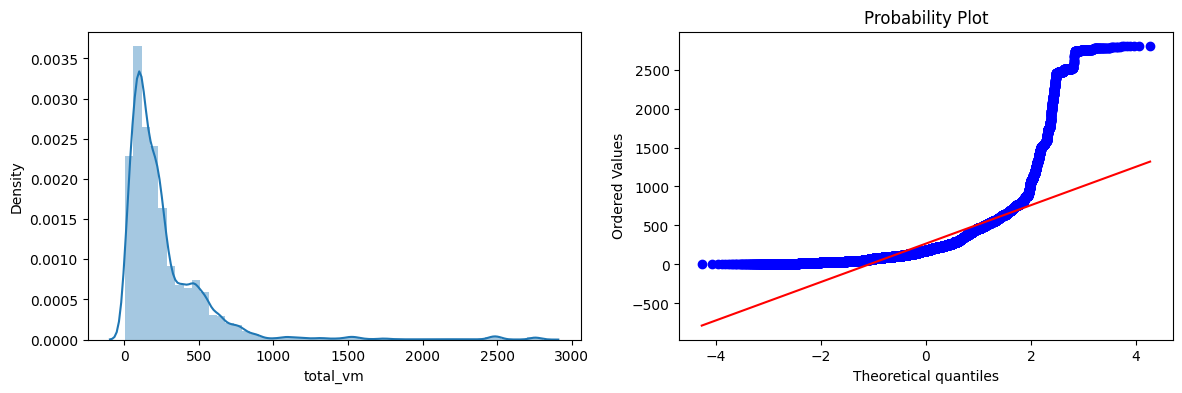

In [53]:
import scipy.stats as stats

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['total_vm'])
plt.subplot(122)
stats.probplot(X_train['total_vm'], dist="norm", plot=plt)

In [54]:
from sklearn.preprocessing import FunctionTransformer

In [55]:
trf = FunctionTransformer(func=np.log1p)

In [56]:
X_train_transform = trf.fit_transform(X_train)
X_train_test = trf.fit_transform(X_test)

In [57]:
X_train_transform.sample(2)

,state,prio,mm_users,total_vm
40797,0.0,21.844705,6.593045,6.642487
70832,0.0,21.844757,6.437752,4.394449


C:\Users\alisa\AppData\Local\Temp\ipykernel_12584\2646358348.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform['total_vm'])


((array([-4.26708798, -4.06481208, -3.95466346, ...,  3.95466346,
          4.06481208,  4.26708798]),
  array([1.60943791, 1.60943791, 1.60943791, ..., 7.94058383, 7.94093976,
         7.94129557])),
 (0.9684440809759691, 5.1457265692097485, 0.9926765638711452))

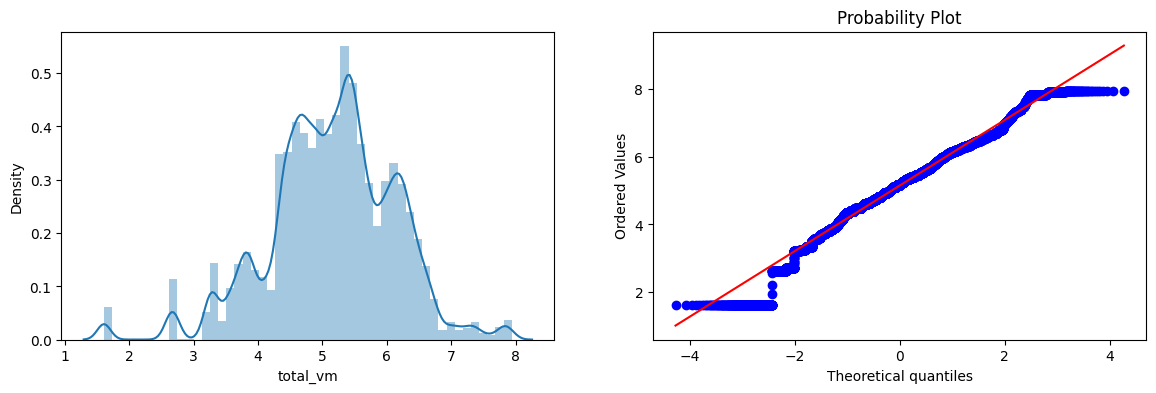

In [58]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train_transform['total_vm'])
plt.subplot(122)
stats.probplot(X_train_transform['total_vm'], dist="norm", plot=plt)

In [59]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [60]:
clf.fit(X_train_transform,y_train)
clf1.fit(X_train_transform,y_train)

DecisionTreeClassifier()

In [61]:
y_pred1 = clf.predict(X_train_transform)
y_pred2 = clf1.predict(X_train_transform)

In [62]:
print("Acc LR" , accuracy_score(y_test,y_pred1))
print("Acc DT" , accuracy_score(y_test,y_pred2))

ValueError: Found input variables with inconsistent numbers of samples: [30000, 70000]